In [1]:
from __future__ import print_function, division
import sys
import os
import numpy as np
import pylab as pl
import pandas as pd
% pylab inline

import json
import os

Populating the interactive namespace from numpy and matplotlib


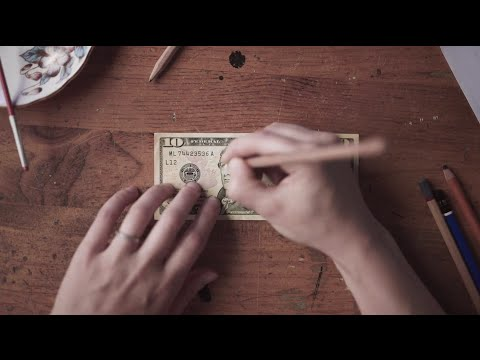

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [3]:
path='http://cosmo.nyu.edu/~fb55/PUI2016/data/'
m_all = pd.read_excel(path + 'pinc08_2_1_1.xls', header = 9)
m_white = pd.read_excel(path + 'pinc08_2_1_4.xls', header = 9)
m_black = pd.read_excel(path + 'pinc08_2_1_6.xls', header = 9)
m_asian = pd.read_excel(path + 'pinc08_2_1_8.xls', header = 9)
m_his = pd.read_excel(path + 'pinc08_2_1_9.xls', header = 9)

fe_all = pd.read_excel(path + 'pinc08_3_1_1.xls', header = 9)
fe_white = pd.read_excel(path + 'pinc08_3_1_4.xls', header = 9)
fe_black = pd.read_excel(path + 'pinc08_3_1_6.xls', header = 9)
fe_asian = pd.read_excel(path + 'pinc08_3_1_8.xls', header = 9)
fe_his = pd.read_excel(path + 'pinc08_3_1_9.xls', header = 9)

In [4]:
allmales = {}
allmales ['all'] = m_all
allmales ['white'] = m_white
allmales ['black'] = m_black
allmales ['asian'] = m_asian
allmales ['his'] = m_his

#allmales ['all'] = pd.DataFrame.to_dict(m_all)
#allmales ['white'] = pd.DataFrame.to_dict(m_white)
#allmales ['black'] = pd.DataFrame.to_dict(m_black)
#allmales ['asian'] = pd.DataFrame.to_dict(m_asian)
#allmales ['his'] = pd.DataFrame.to_dict(m_his)

allfemales = {}
allfemales ['all'] = fe_all
allfemales ['white'] = fe_white
allfemales ['black'] = fe_black
allfemales ['asian'] = fe_asian
allfemales ['his'] = fe_his

#allfemales ['all'] = pd.DataFrame.to_dict(fe_all)
#allfemales ['white'] = pd.DataFrame.to_dict(fe_white)
#allfemales ['black'] = pd.DataFrame.to_dict(fe_black)
#allfemales ['asian'] = pd.DataFrame.to_dict(fe_asian)
#allfemales ['his'] = pd.DataFrame.to_dict(fe_his)


In [5]:
type(allfemales)

dict

In [6]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [7]:
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [8]:
for k,v in allfemales.items():
    print("Female", k)
    print(v.describe())
for k,v in allmales.items():
    print("Male", k)
    print(v.describe())

Female white
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        12310.782609           2214.586957        673.413043   
std         19885.397175           5970.622977        776.907047   
min            76.000000              0.000000          4.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         74382.000000          30286.000000       2583.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         781.195652        971.630435         1036.956522   
std         1023.663283       1566.965750         1730.981173   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN        

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN                 NaN 

In [9]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [10]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
#from pandas.tools.plotting import scatter_matrix

In [12]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


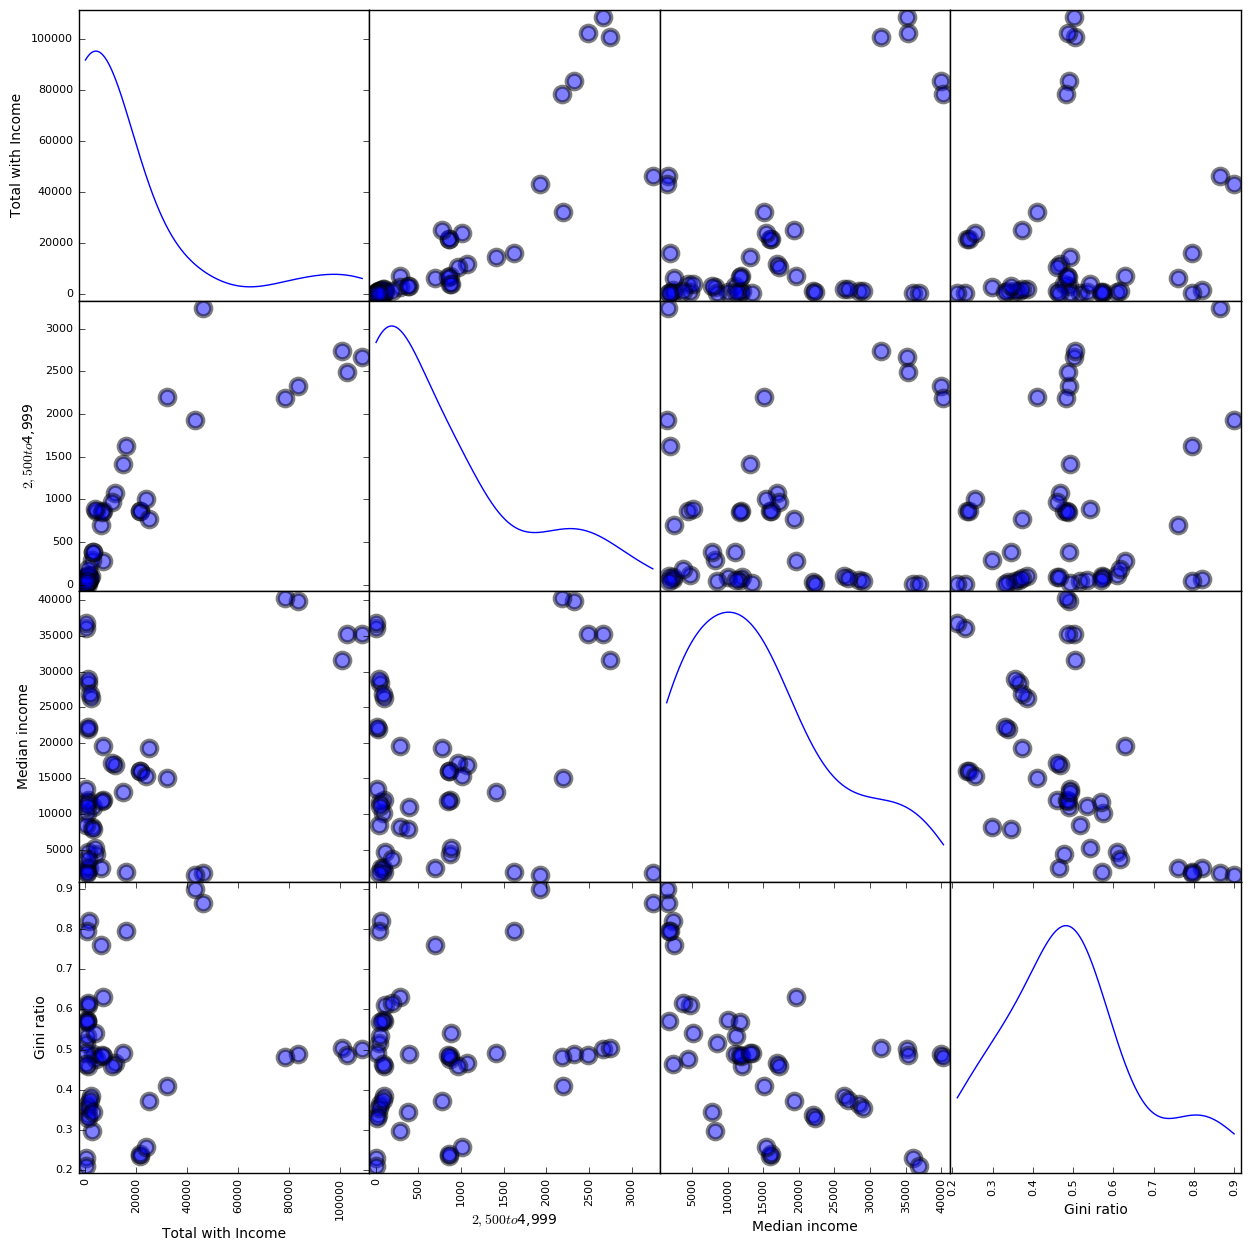

In [13]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')  

In [14]:
data = allmales['all'][[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']]

In [15]:
m_income = []
fe_income = []
for key, value in allmales.items():
    m_income.append(allmales[key]['Median income'][1])

for key, value in allfemales.items():
    fe_income.append(allfemales[key]['Median income'][1])

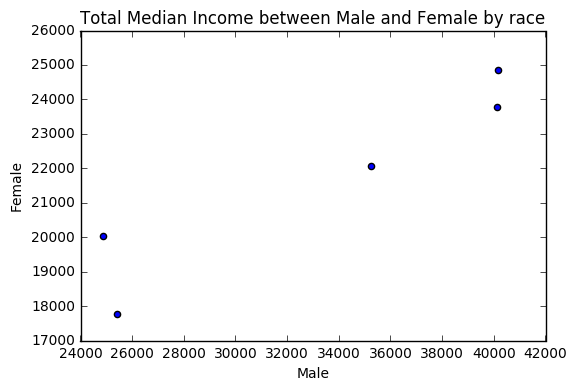

In [16]:
pl.scatter(m_income, fe_income)
pl.xlabel('Male')
pl.ylabel('Female')
pl.title('Total Median Income between Male and Female by race')

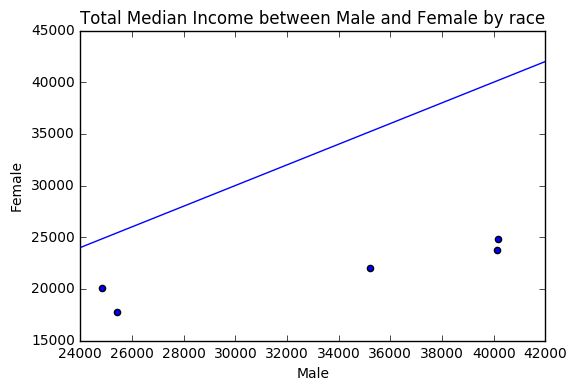

In [17]:
x = np.arange(24000, 42000,.1)
pl.scatter(m_income, fe_income)
pl.plot(x,x)
pl.xlim(24000,42000)
pl.xlabel('Male')
pl.ylabel('Female')
pl.title('Total Median Income between Male and Female by race')

## 4. Add a fitted line
### I use statsmodel package to calculate the paramateres of the fitted line

In [18]:
import statsmodels.api as sm 

In [19]:
X = sm.add_constant(m_income)

In [20]:
our_model = sm.OLS(fe_income,X).fit()

In [21]:
our_model.params

array([  9.98984441e+03,   3.53140683e-01])

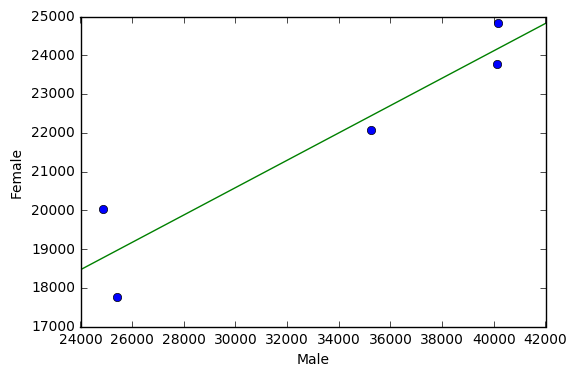

In [22]:
pl.plot(m_income, fe_income, 'o')
pl.xlabel('Male')
pl.ylabel('Female')

pl.plot(x, our_model.predict(sm.add_constant(x)))

### Add the analytical solution line

In [23]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['his']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'his','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

In [24]:
y = beta0 + beta1*x

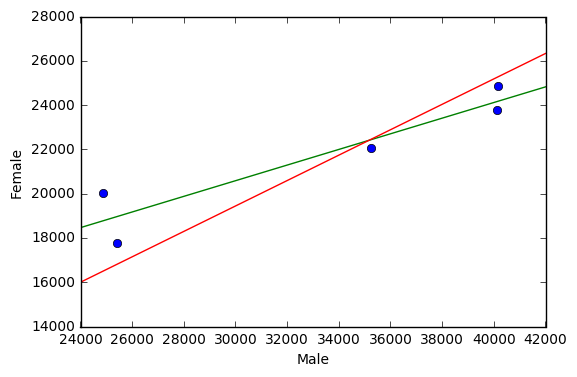

In [25]:
pl.plot(m_income, fe_income, 'o')
pl.xlabel('Male')
pl.ylabel('Female')

pl.plot(x, our_model.predict(sm.add_constant(x)))
pl.plot(x, y)

### Comparision: The line developed from the analytical solution has a smaller intercept and steeper slope than the fitted line generated using Statsmodel

## 5.

In [26]:
all_males_allincomes = np.array(
    np.concatenate([allmales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'his', 'asian']]).flatten())

In [27]:
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'his', 'asian']]).flatten())

In [28]:
mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

### Create x values for model

In [29]:
x1 = np.arange(0,49000,.1)

In [ ]:
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()

### Analytical line

In [103]:
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1 = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0 = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta0, beta1

(1293.7640487731387, 0.62234483903975324)

In [31]:
y1 = beta0 + beta1 * x1

### Poly fit line

In [32]:
poly = numpy.polyfit(all_males_allincomes[mask],all_females_allincomes[mask], deg = 1)

In [33]:
poly

array([  6.09020524e-01,   1.49303944e+03])

In [34]:
y2 = poly[0] + poly[1]*x

### My regression

In [35]:
X1 = sm.add_constant(all_males_allincomes[mask])
my_model = sm.OLS(all_females_allincomes[mask],X1).fit()

In [36]:
my_model.params

array([  1.49303944e+03,   6.09020524e-01])

In [37]:
y3 = my_model.params[0] + my_model.params[1]*x

### Regression through 0

In [38]:
nobeta0_model = sm.OLS(all_females_allincomes[mask],all_males_allincomes[mask]).fit()

In [39]:
nobeta0_model.params

array([ 0.67142838])

### Graph

In [40]:
x1 = np.arange(0,49000,.1)

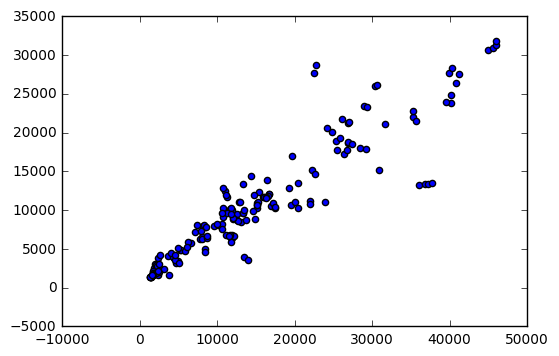

In [41]:
pl.scatter(all_males_allincomes[mask],all_females_allincomes[mask])

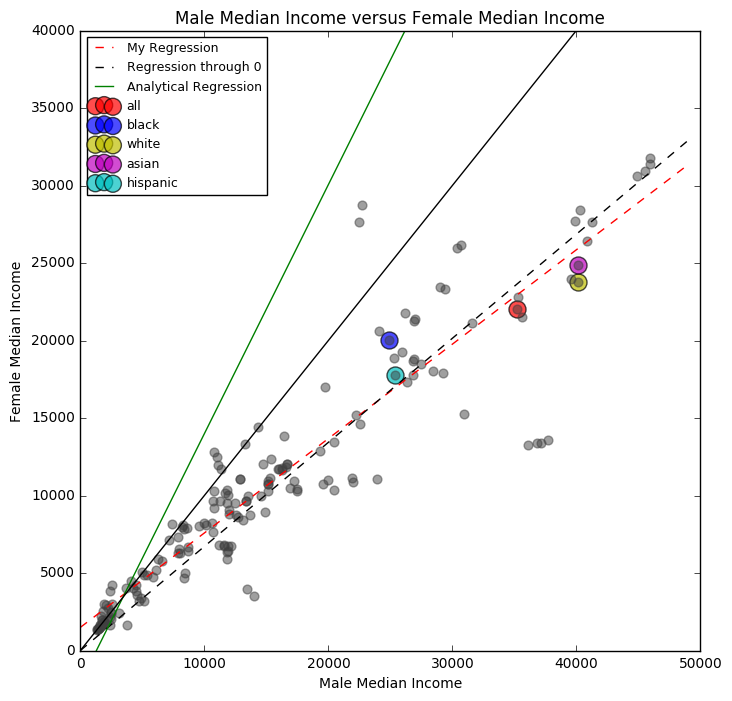

In [102]:
fig = pl.figure(figsize=(8,8))

all_ = pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], s = 150, c='r', alpha = 0.7, marker='o', label = 'all')
black_ = plt.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], s=150, c='b',alpha = 0.7, marker='o', label = 'black')
white_ = plt.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], s=150, c='y',alpha = 0.7, marker='o', label = 'white')
asian_ = plt.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], s=150, c='m',alpha = 0.7, marker='o', label ='asian')
his_ = plt.scatter(allmales['his']['Median income'][1], allfemales['his']['Median income'][1], s=150, c='c',alpha = 0.7, marker='o', label = 'hispanic')

pl.scatter(all_males_allincomes[mask],all_females_allincomes[mask], color ='0.25', alpha = 0.5, s = 40)
my_regression = pl.plot(x1, my_model.predict(sm.add_constant(x1)),'r--', label = 'My Regression')
nobeta0_regression = pl.plot(x1, nobeta0_model.predict(x1),'k--',alpha = 1, label = 'Regression through 0')
analytical_regression = pl.plot(y1,x1,'g', label = 'Analytical Regression')
pl.plot(x1,x1,'k')

pl.legend(loc='upper left', prop={'size':9})
pl.xlabel('Male Median Income')
pl.ylabel('Female Median Income')
pl.xlim(0,50000)
pl.ylim(0,40000)
pl.title('Male Median Income versus Female Median Income')

### 6. Prediction

In [ ]:
my_stipend = 80000

In [ ]:
w_stipend = my_model.params[0] + my_model.params[1] * my_stipend
w_stipend

### If a man is offered my desired stipend, which is 80,000 dollars, the woman in the same position with him will receive 50,214 dollars based on the regression results from my_model.

### 7. Comments: There are differences in races. Based on the Total Median Income, there is a higher equality in salary between men and woman in black people compared to the other races (The slope of the line connecting zero and the dot of black people is steeper than those of other races)